## Goals:
* Minimize intra-cluster distance
* Maximize inter-cluster distance
* Divide data into non-overlapping clusters without cluster-internal structure
* Cluster similar data points into a same cluster, and dissimilar data points into other clusters

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.collections as mcol
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib.lines import Line2D
import numpy as np
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

## Create some random data

In [2]:
# Create 5000 samples
np.random.seed(0)
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)
print(X[0:5])

[[-1.82150565  0.07098024]
 [ 2.16732621 -2.93199608]
 [ 0.8465158  -3.26075305]
 [-1.44019058 -1.36678252]
 [ 4.90119792  4.53749125]]


Text(0.5, 1.0, 'Cluster Data')

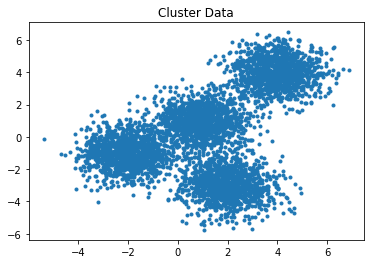

In [3]:
fig, ax = plt.subplots()
plt.scatter(X[:, 0], X[:, 1], marker='.')
ax.set_title('Cluster Data')

## Create Random Cluster Centers

In [4]:
ctrs = []
x_vals = [np.random.randint(-5, 7) for i in range(4)]
y_vals = [np.random.randint(-5, 7) for i in range(4)]
for i, v in enumerate(x_vals):
    ctrs.append([x_vals[i], y_vals[i]])
print(ctrs)

[[-3, 1], [5, 3], [4, 3], [-1, 6]]


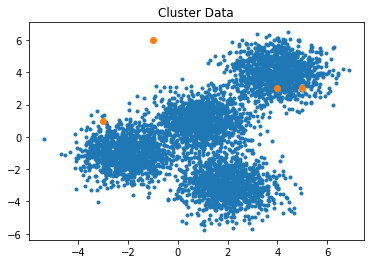

In [5]:
plt.sca(ax)
plt.scatter(x_vals, y_vals, marker='o')

## Create Functions to Find Distance and Assign Points to Centers

In [6]:
def find_dist(pt1, pt2):
    x1 = pt1[0]
    y1 = pt1[1]
    x2 = pt2[0]
    y2 = pt2[1]
    distance = np.sqrt(((x1 - x2)**2)+((y1 - y2)**2))
    return distance

In [ ]:
# NOT WORKING PROPERLY
# Calculate distance from center and assign to closest one for each point
def assign_points(printing=True):
    ctr_points = [[], [], [], []]
    avgs = []
    for i in X:
        dists = []
        #print("centers:", ctrs)
        for point in ctrs:
            dists.append(find_dist(point, i))
        dists = pd.Series(dists)
        #print("distances:\n{}".format(dists))
        for j, dist in enumerate(dists):
            if j == dists.idxmin():
                ctr_points[j].append(i)
    for ctr in ctr_points:
        ctr = pd.Series(ctr)
        avg = ctr.mean()
        avgs.append(avg)
    if printing:
        print("Center 1 ({0}):\n\tPoints in Cluster: {1}\n\tAverage Point: {2}\nCenter 2 ({3}):\n\tPoints in Cluster: {4}\n\tAverage Point: {5}\nCenter 3 ({6}):\n\tPoints in Cluster: {7}\n\tAverage Point: {8}\nCenter 4 ({9}): \n\tPoints in Cluster:{10}\n\tAverage Point: {11}".format(
             ctrs[0], len(ctr_points[0]), avgs[0], ctrs[1], len(ctr_points[1]), avgs[1], ctrs[2], len(ctr_points[2]), avgs[2], ctrs[3], len(ctr_points[3]), avgs[3]))
        return avgs, ctr_points
avgs, ctr_points = assign_points()

In [ ]:
# NOT WORKING PROPERLY
# Transform old centers into new averaged centers
def reassign():
    global ctrs
    print("Old Centers: {}".format(ctrs))
    print("New Centers: {}".format(avgs))
    fig, ax = plt.subplots()
    ctrs1 = []
    for i in ctr_points:
        i = np.asanyarray(i)
        ctrs1.append(i)
    #plt.scatter(X[:, 0], X[:, 1], marker='.')
    ctrs1 = np.asanyarray(ctrs1, dtype=object)
    plt.scatter(ctrs1[0][:, 0], ctrs1[0][:, 1], marker='.', color='y')
    plt.scatter(ctrs1[1][:, 0], ctrs1[1][:, 1], marker='.', color='b')
    plt.scatter(ctrs1[2][:, 0], ctrs1[2][:, 1], marker='.', color='m')
    plt.scatter(ctrs1[3][:, 0], ctrs1[3][:, 1], marker='.', color='k')
    ax.set_title('Cluster Data')
    plt.sca(ax)
    old_ctrs = np.asanyarray(ctrs)
    plt.scatter(old_ctrs[:][:, 0], old_ctrs[:][:, 1], marker='o', color='red')
    ctrs = np.asanyarray(avgs)
    plt.scatter(ctrs[:][:, 0], ctrs[:][:, 1], marker='o', color='green')
    plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'random center', 'optimized center'], bbox_to_anchor=(1,1))
    return ctrs
reassign()

## Run Optimization

In [ ]:
# NOT WORKING PROPERLY
# Can repeat this as much as desired; will incremement one repitition at a time
avgs, ctr_points = assign_points()
reassign()

## Repeat many times

In [ ]:
# NOT WORKING PROPERLY

repeat = 5 # specify number of repititions
for i in range(int(repeat)):
    avgs = assign_points()
    reassign()

In [ ]:
# NOT WORKING PROPERLY
orig_ctrs = [[-3, 1], [5, 3], [4, 3], [-1, 6]]
print("Original Centers: {}".format(orig_ctrs))
print("Optimal Centers: {}".format(avgs))
fig, ax = plt.subplots()
plt.scatter(X[:, 0], X[:, 1], marker='.')
ax.set_title('Cluster Data')
plt.sca(ax)
old_ctrs = np.asanyarray(orig_ctrs)
plt.scatter(old_ctrs[:][:, 0], old_ctrs[:][:, 1], marker='o', color='red')
ctrs = np.asanyarray(avgs)
plt.scatter(ctrs[:][:, 0], ctrs[:][:, 1], marker='o', color='green')
plt.legend(['data', 'random center', 'optimized center'])

## Before and After

Center 1 ([-3, 1]): 2377
	Average Point: [-0.69738723 -1.17818274]
Center 2 ([5, 3]): 338
	Average Point: [5.05279505 3.79962483]
Center 3 ([4, 3]): 2272
	Average Point: [2.68044289 1.16955776]
Center 4 ([-1, 6]): 13
	Average Point: [0.38026682 3.69719186]
Original Centers: [[-3, 1], [5, 3], [4, 3], [-1, 6]]
Optimal Centers: [array([-0.69738723, -1.17818274]), array([5.05279505, 3.79962483]), array([2.68044289, 1.16955776]), array([0.38026682, 3.69719186])]


C:\Users\jusla\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Center 1 ([-0.69738723 -1.17818274]): 2613
	Average Point: [-0.2245774  -1.72678875]
Center 2 ([5.05279505 3.79962483]): 1081
	Average Point: [4.16260201 4.08654774]
Center 3 ([2.68044289 1.16955776]): 1008
	Average Point: [1.96394445 0.48819888]
Center 4 ([0.38026682 3.69719186]): 298
	Average Point: [0.84717099 2.6559327 ]
Original Centers: [[-3, 1], [5, 3], [4, 3], [-1, 6]]
Optimal Centers: [array([-0.2245774 , -1.72678875]), array([4.16260201, 4.08654774]), array([1.96394445, 0.48819888]), array([0.84717099, 2.6559327 ])]
Center 1 ([-0.2245774  -1.72678875]): 2402
	Average Point: [-0.22851104 -1.95564667]
Center 2 ([4.16260201 4.08654774]): 1205
	Average Point: [4.03796569 4.02335979]
Center 3 ([1.96394445 0.48819888]): 895
	Average Point: [1.68860489 0.09586091]
Center 4 ([0.84717099 2.6559327 ]): 498
	Average Point: [0.63634233 1.91275254]
Original Centers: [[-3, 1], [5, 3], [4, 3], [-1, 6]]
Optimal Centers: [array([-0.22851104, -1.95564667]), array([4.03796569, 4.02335979]), arr

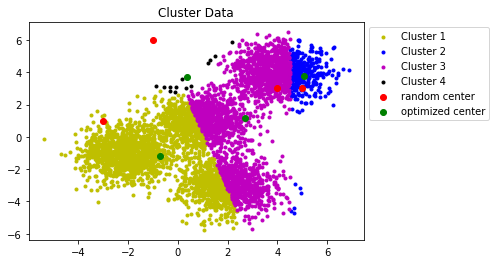

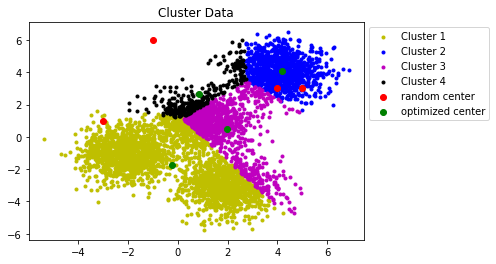

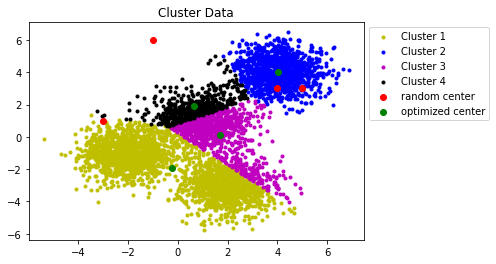

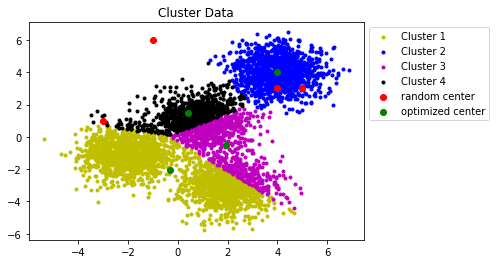

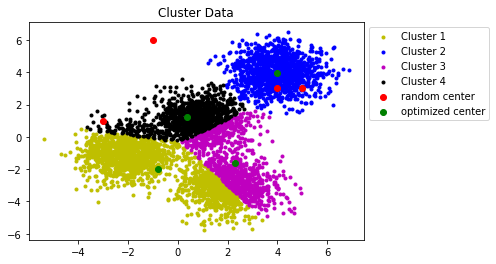

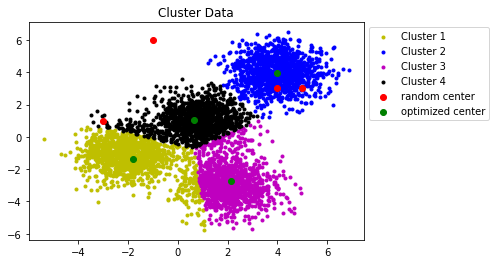

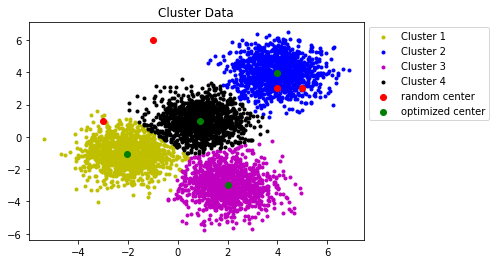

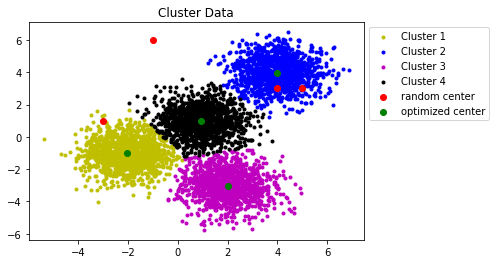

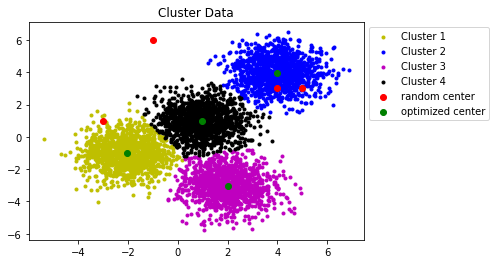

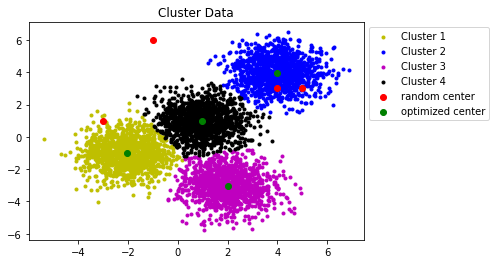

In [7]:
repititions = int(10)
for i in range(repititions):
    ctr_points = [[], [], [], []]
    avgs = []
    for i in X:
        dists = []
        #print("centers:", ctrs)
        for point in ctrs:
            dists.append(find_dist(point, i))
        dists = pd.Series(dists)
        #print("distances:\n{}".format(dists))
        for j, dist in enumerate(dists):
            if j == dists.idxmin():
                #print('min. distance: {0}\ndistance: {1}'.format(dists.idxmin(), dist))
                ctr_points[j].append(i)
    for ctr in ctr_points:
        ctr = pd.Series(ctr)
        avg = ctr.mean()
        avgs.append(avg)
    print("Center 1 ({0}): {1}\n\tAverage Point: {2}\nCenter 2 ({3}): {4}\n\tAverage Point: {5}\nCenter 3 ({6}): {7}\n\tAverage Point: {8}\nCenter 4 ({9}): {10}\n\tAverage Point: {11}".format(
        ctrs[0], len(ctr_points[0]), avgs[0], ctrs[1], len(ctr_points[1]), avgs[1], ctrs[2], len(ctr_points[2]), avgs[2], ctrs[3], len(ctr_points[3]), avgs[3]))
    orig_ctrs = [[-3, 1], [5, 3], [4, 3], [-1, 6]]
    ctrs1 = []
    for i in ctr_points:
        i = np.asanyarray(i)
        ctrs1.append(i)
    ctrs1 = np.asanyarray(ctrs1)
    print("Original Centers: {}".format(orig_ctrs))
    print("Optimal Centers: {}".format(avgs))
    fig, ax = plt.subplots()
    plt.scatter(ctrs1[0][:, 0], ctrs1[0][:, 1], marker='.', color='y')
    plt.scatter(ctrs1[1][:, 0], ctrs1[1][:, 1], marker='.', color='b')
    plt.scatter(ctrs1[2][:, 0], ctrs1[2][:, 1], marker='.', color='m')
    plt.scatter(ctrs1[3][:, 0], ctrs1[3][:, 1], marker='.', color='k')
    ax.set_title('Cluster Data')
    plt.sca(ax)
    old_ctrs = np.asanyarray(orig_ctrs)
    plt.scatter(old_ctrs[:][:, 0], old_ctrs[:][:, 1], marker='o', color='red')
    ctrs = np.asanyarray(avgs)
    plt.scatter(ctrs[:][:, 0], ctrs[:][:, 1], marker='o', color='green')
    plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'random center', 'optimized center'], loc='upper left', bbox_to_anchor = (1,1))